# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data

In [9]:
df = pd.read_csv('Pak_Election_Voting_Results_Dawn_API_Combine.csv')

#Display Basic information
print("BASIC INFORMATION")
print(df.info())

print(df.head())

BASIC INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   province                1008 non-null   object 
 1   district                1008 non-null   object 
 2   constituency_name       1008 non-null   object 
 3   pop                     1008 non-null   float64
 4   no_of_polling_stations  1008 non-null   int64  
 5   male                    994 non-null    float64
 6   female                  946 non-null    float64
 7   total                   1008 non-null   int64  
 8   na_name                 1008 non-null   object 
 9   obtained_votes          1008 non-null   int64  
 10  candidate_name          1004 non-null   object 
 11  party_affilation        1003 non-null   object 
 12  party                   1000 non-null   object 
 13  geom                    1008 non-null   object 
 14  YEAR_ELECTION         

# Data Cleaning

In [10]:
#Drop NaN columns
df_cleaned = df.dropna(axis = 1, how = 'all').copy()

# Fill remaining NaN values
df_cleaned.fillna({'no_of_polling_stations': df_cleaned['no_of_polling_stations'].median(),
                   'male': df_cleaned['male'].median(),
                   'female': df_cleaned['female'].median(),
                   'total': df_cleaned['total'].median(),
                   'obtained_votes': df_cleaned['obtained_votes'].median()
                  }, inplace = True)
# Convert 'YEAR_ELECTION' to categorical
df_cleaned['YEAR_ELECTION'] = df_cleaned['YEAR_ELECTION'].astype('category')

print("DataFrame after cleaning:")
print(df_cleaned.info())
print(df_cleaned.head())

DataFrame after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   province                1008 non-null   object  
 1   district                1008 non-null   object  
 2   constituency_name       1008 non-null   object  
 3   pop                     1008 non-null   float64 
 4   no_of_polling_stations  1008 non-null   int64   
 5   male                    1008 non-null   float64 
 6   female                  1008 non-null   float64 
 7   total                   1008 non-null   int64   
 8   na_name                 1008 non-null   object  
 9   obtained_votes          1008 non-null   int64   
 10  candidate_name          1004 non-null   object  
 11  party_affilation        1003 non-null   object  
 12  party                   1000 non-null   object  
 13  geom                    1008 non-null   object  
 14

# Data Analysis

In [63]:
# Total votes obtained by each candidate
votes_by_candidate = df_cleaned.groupby('candidate_name')['obtained_votes'].sum().sort_values(ascending =  False)

print('\n**** Top vote earners ****')
print(votes_by_candidate.head(10))

#Total votes obtained by each party
votes_by_party = df_cleaned.groupby('party')['obtained_votes'].sum().sort_values(ascending = False)

print('\n**** Votes by party ****')
print(votes_by_party)

# Number of constituencies won by eacg party
constituencies_won = df_cleaned.groupby('party')['na_name'].nunique().sort_values(ascending = False)

print('\n**** Constituencies win by each party ****')
print(constituencies_won)


**** Top vote earners ****
candidate_name
Rana Tanveer Hussain           391707
Imran Ahmad Khan Niazi         372471
Abdul Waseem                   360402
Syed Ghulam Mustafa Shah       327617
Ahsan Iqbal                    322134
Tariq Bashir Cheema            316020
Sufyan Yousuf                  313196
Tahir Sadiq                    310010
Imran Khan                     304301
Syed Ayaz Ali Shah Sheerazi    295766
Name: obtained_votes, dtype: int64

**** Votes by party ****
party
PMLN          30996170
PPP           17760303
PTI           11540324
PTI-Backed    10108953
MQM            4213282
IND            4131367
PML-Q          3399606
MQM-P          1348574
PML-F           726198
MMA             438504
ANP             414399
JUI-F           331132
JUIP            276482
IPP             264065
NPP             247912
GDA             157773
AML             119362
BAP             115420
AMLP             88627
PMLZ             84312
PML-Z            79306
BNP              79304
JI  

# Data Visualization

# Top Vote Earners

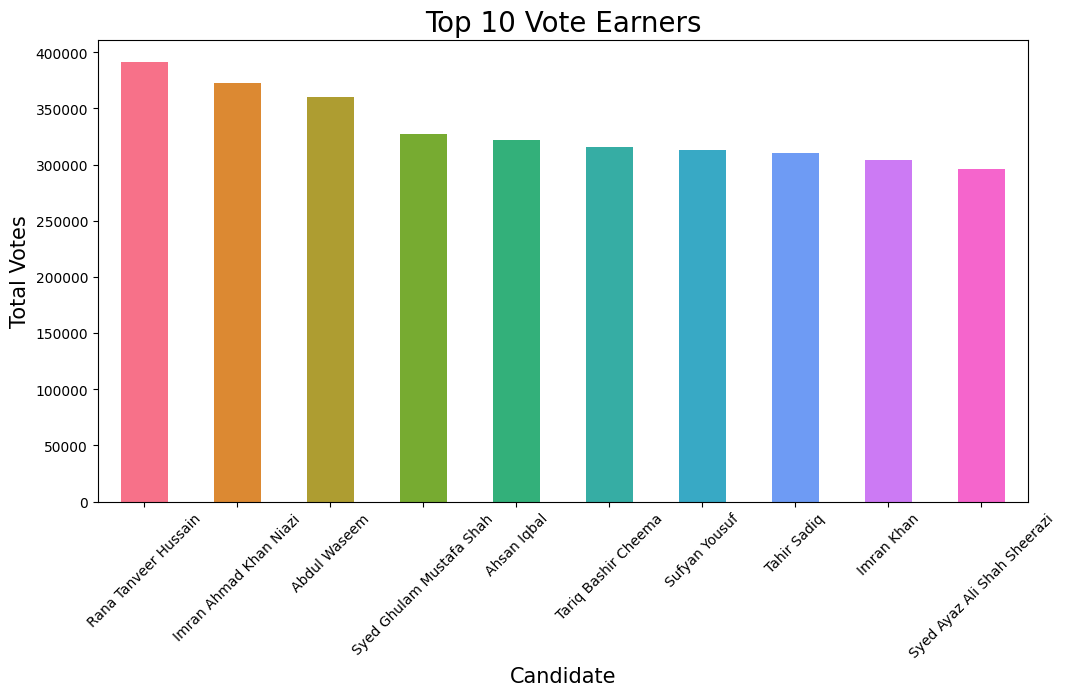

In [20]:
# Define the color palette
palette = sns.color_palette("husl", 10)

# Create the plot
plt.figure(figsize=(12, 6))
votes_by_candidate.head(10).plot(kind='bar', color=palette)
plt.title('Top 10 Vote Earners', fontsize = 20)
plt.xlabel('Candidate', fontsize = 15)
plt.ylabel('Total Votes', fontsize = 15)
plt.xticks(rotation=45)
plt.show()


# Votes by Party

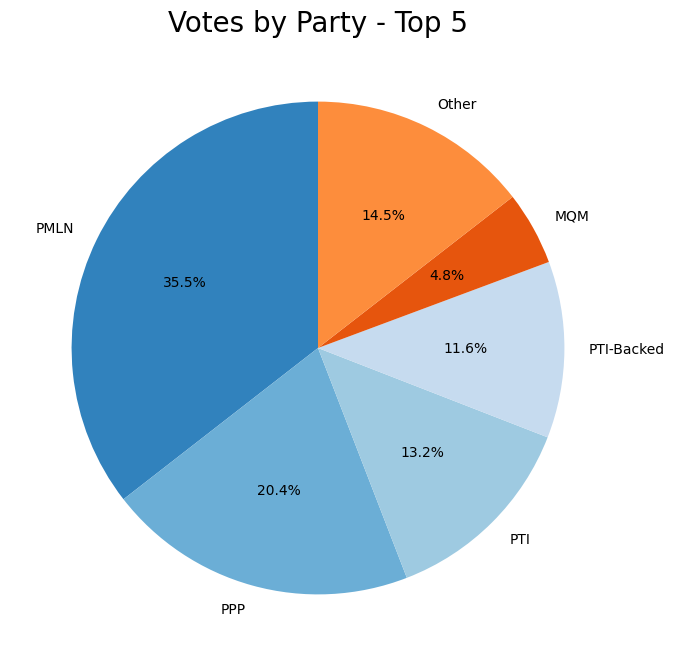

In [49]:
plt.figure(figsize=(8, 8))

# Calculate the sum of votes by party
votes_by_party = df_cleaned.groupby('party')['obtained_votes'].sum()

# Sort the parties by obtained votes and select the top 5
top_parties = votes_by_party.sort_values(ascending=False).head(5)

# Sum the votes of the other parties
other_votes = votes_by_party.sort_values(ascending=False)[5:].sum()

# Combine the top 5 with the 'Other' category
top_parties['Other'] = other_votes

# Plot the pie chart
top_parties.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20c.colors  # Use a color map for better distinction
)

plt.title('Votes by Party - Top 5', fontsize = 20)
plt.ylabel('')  # Hide the y-axis label
plt.show()


# Voter Demographics

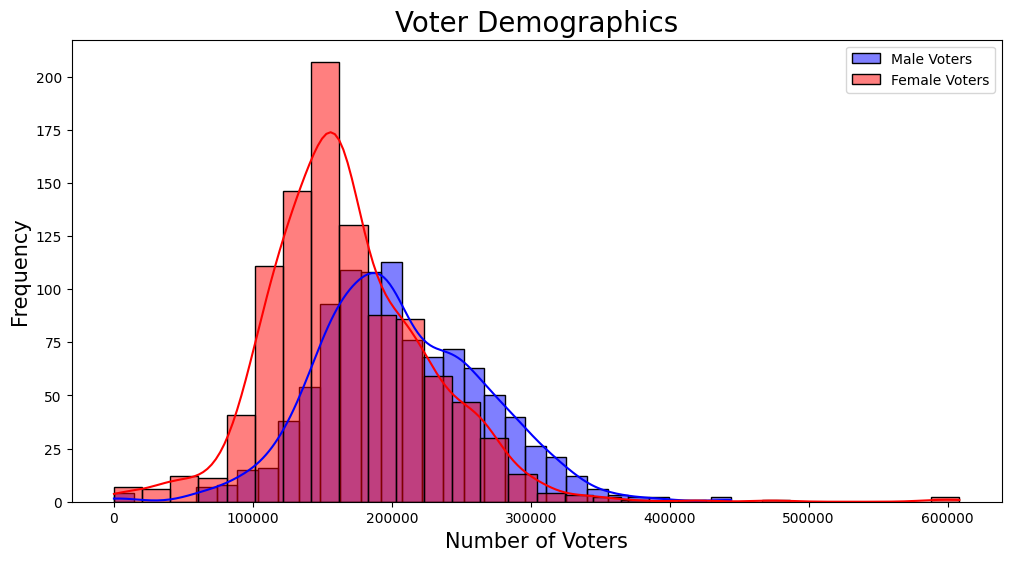

In [23]:
# Male and female voter distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['male'], bins=30, kde=True, color='blue', label='Male Voters')
sns.histplot(df_cleaned['female'], bins=30, kde=True, color='red', label='Female Voters')
plt.title('Voter Demographics', fontsize = 20)
plt.xlabel('Number of Voters', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()
plt.show()


# Constituencies Won by Party

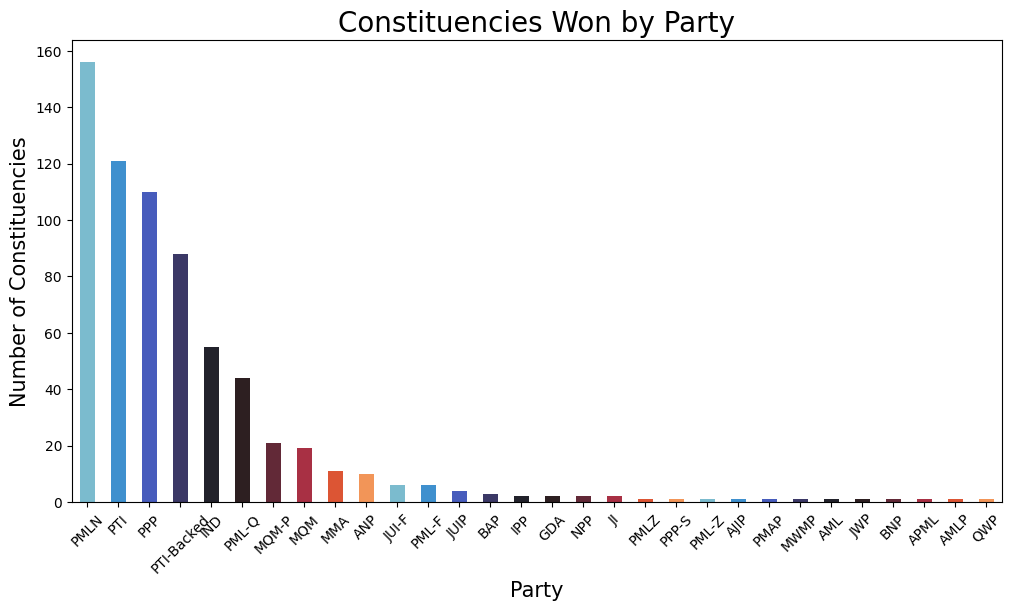

In [62]:
# Define the color palette
palette = sns.color_palette("icefire", 10)

# Create the plot
plt.figure(figsize=(12, 6))
constituencies_won.plot(kind='bar', color = palette)
plt.title('Constituencies Won by Party', fontsize = 20)
plt.xlabel('Party', fontsize = 15)
plt.ylabel('Number of Constituencies', fontsize = 15)
plt.xticks(rotation=45)
plt.show()


# Correlation Analysis

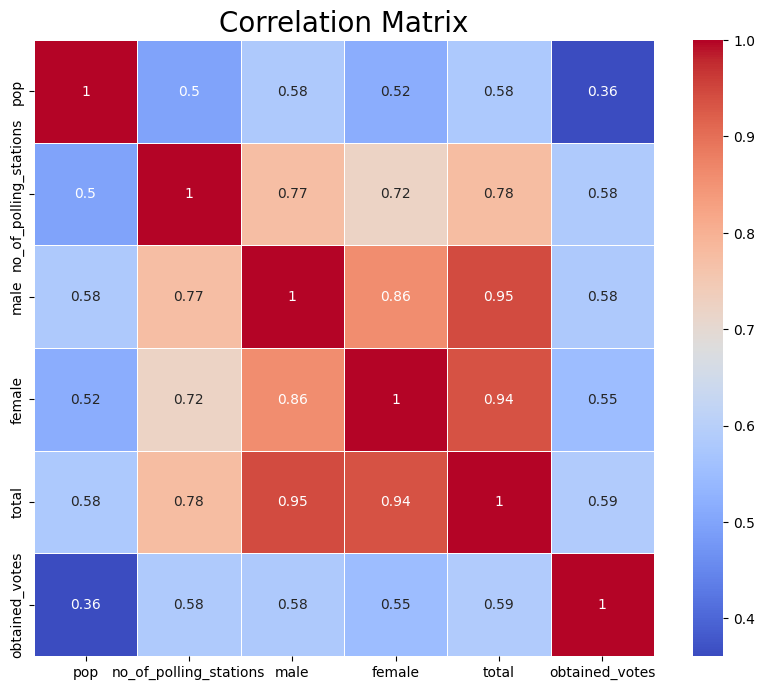

In [27]:
# Correlation matrix
corr_matrix = df_cleaned[['pop', 'no_of_polling_stations', 'male', 'female', 'total', 'obtained_votes']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()


# Turnout Rate by Province

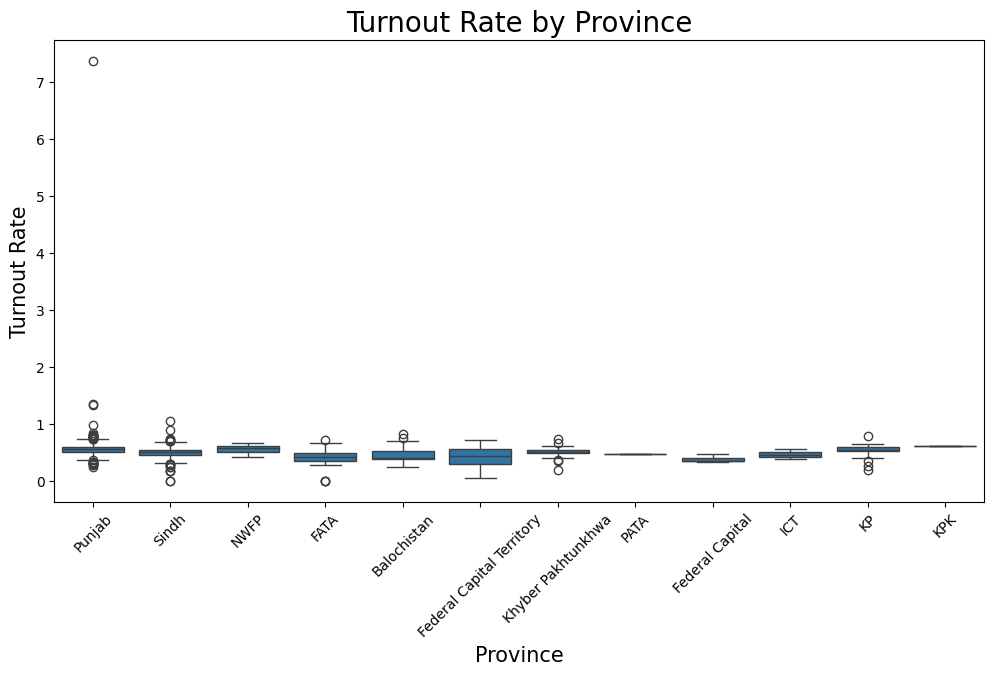

In [32]:
df_cleaned['turnout_rate'] = df_cleaned['total'] / df_cleaned['pop']

plt.figure(figsize=(12, 6))
sns.boxplot(x='province', y='turnout_rate', data=df_cleaned)
plt.title('Turnout Rate by Province', fontsize = 20)
plt.xlabel('Province', fontsize = 15)
plt.ylabel('Turnout Rate', fontsize = 15)
plt.xticks(rotation=45)
plt.show()


# Votes by Constituency

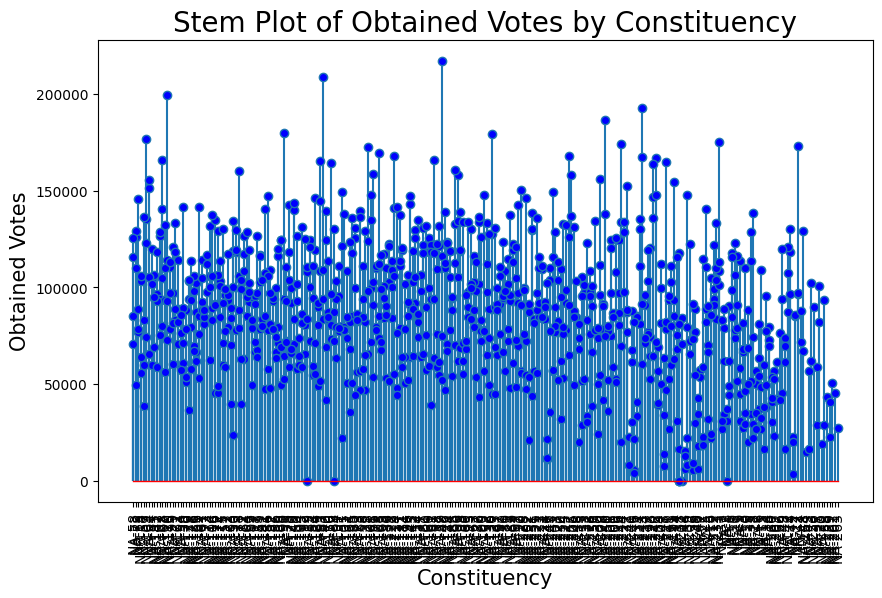

In [38]:
plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(df_cleaned['na_name'], df_cleaned['obtained_votes'])
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 1)
plt.title('Stem Plot of Obtained Votes by Constituency', fontsize = 20)
plt.xlabel('Constituency', fontsize = 15)
plt.ylabel('Obtained Votes', fontsize = 15)
plt.xticks(rotation=90)
plt.show()


# Mean Votes 

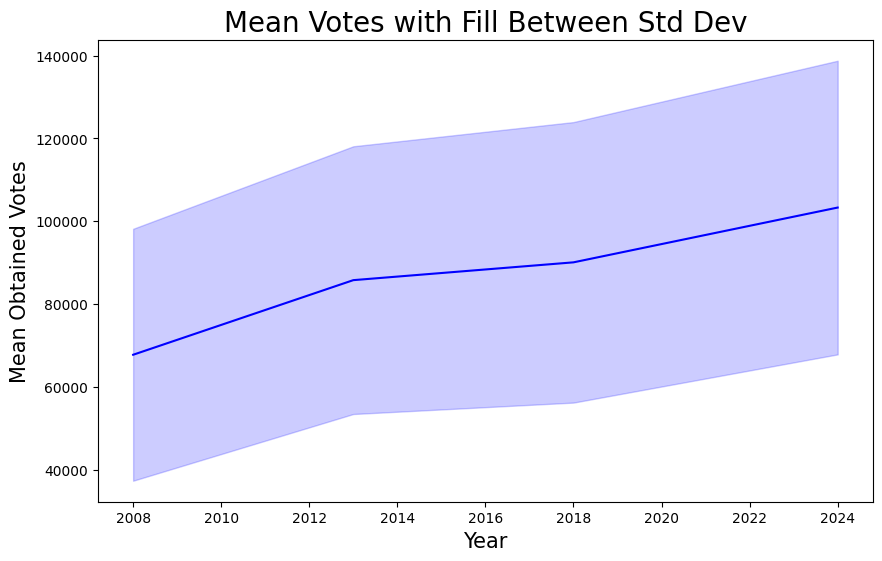

In [36]:
years = df_cleaned['YEAR_ELECTION'].cat.categories
mean_votes = df_cleaned.groupby('YEAR_ELECTION', observed=True)['obtained_votes'].mean()
std_votes = df_cleaned.groupby('YEAR_ELECTION', observed=True)['obtained_votes'].std()

plt.figure(figsize=(10, 6))
plt.plot(years, mean_votes, color='b')
plt.fill_between(years, mean_votes - std_votes, mean_votes + std_votes, color='b', alpha=0.2)
plt.title('Mean Votes with Fill Between Std Dev', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Mean Obtained Votes', fontsize = 15)
plt.show()


# Votes Obtained by Province

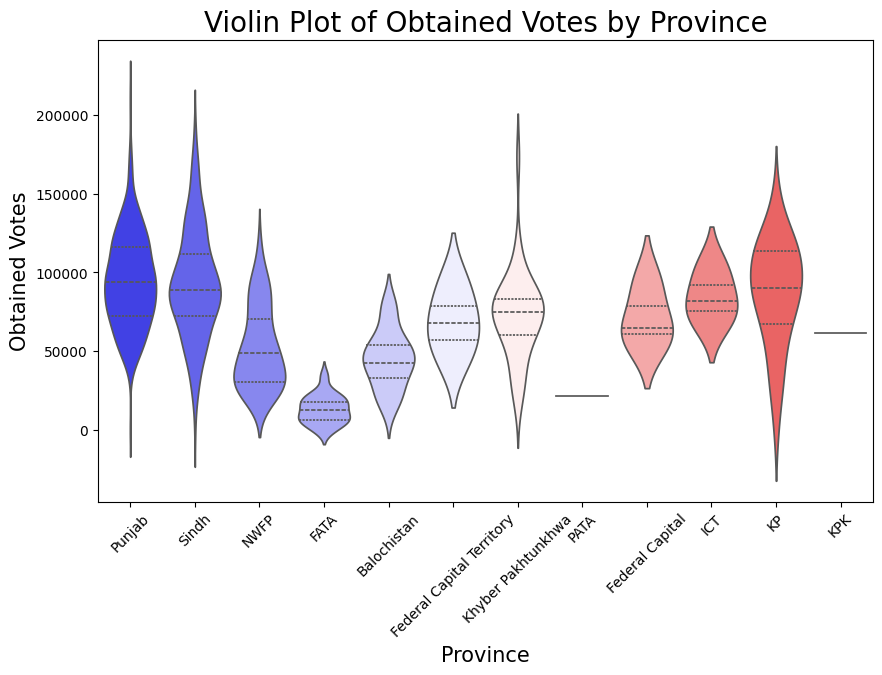

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='province', y='obtained_votes', data=df_cleaned, inner='quartile', hue = 'province', palette = 'bwr')
plt.title('Violin Plot of Obtained Votes by Province', fontsize = 20)
plt.xlabel('Province', fontsize = 15)
plt.ylabel('Obtained Votes', fontsize =15)
plt.xticks(rotation=45)
plt.show()


# Constituencies by Province

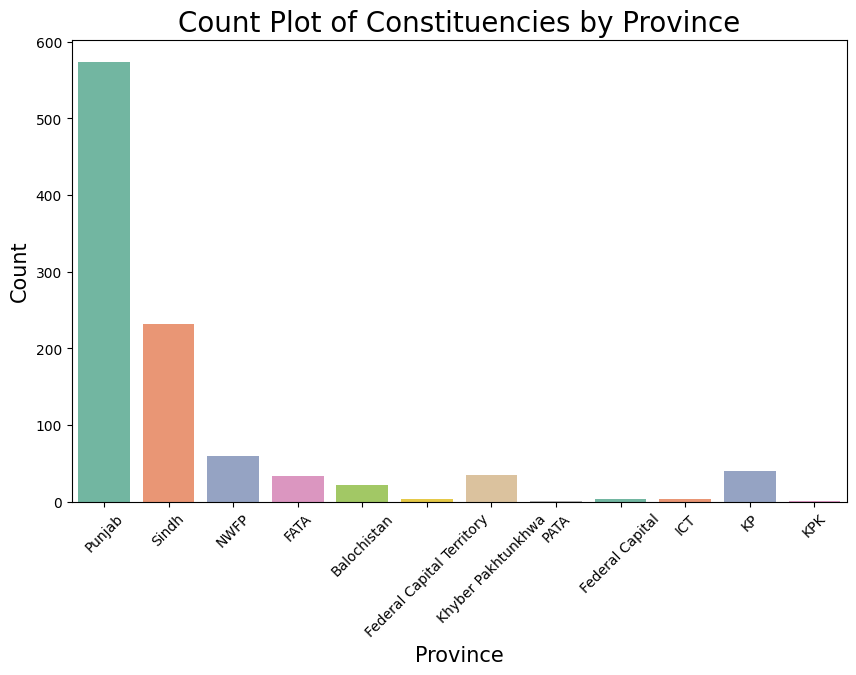

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='province', data=df_cleaned, hue = 'province', palette='Set2')
plt.title('Count Plot of Constituencies by Province', fontsize = 20)
plt.xlabel('Province', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=45)
plt.show()


# Election Data

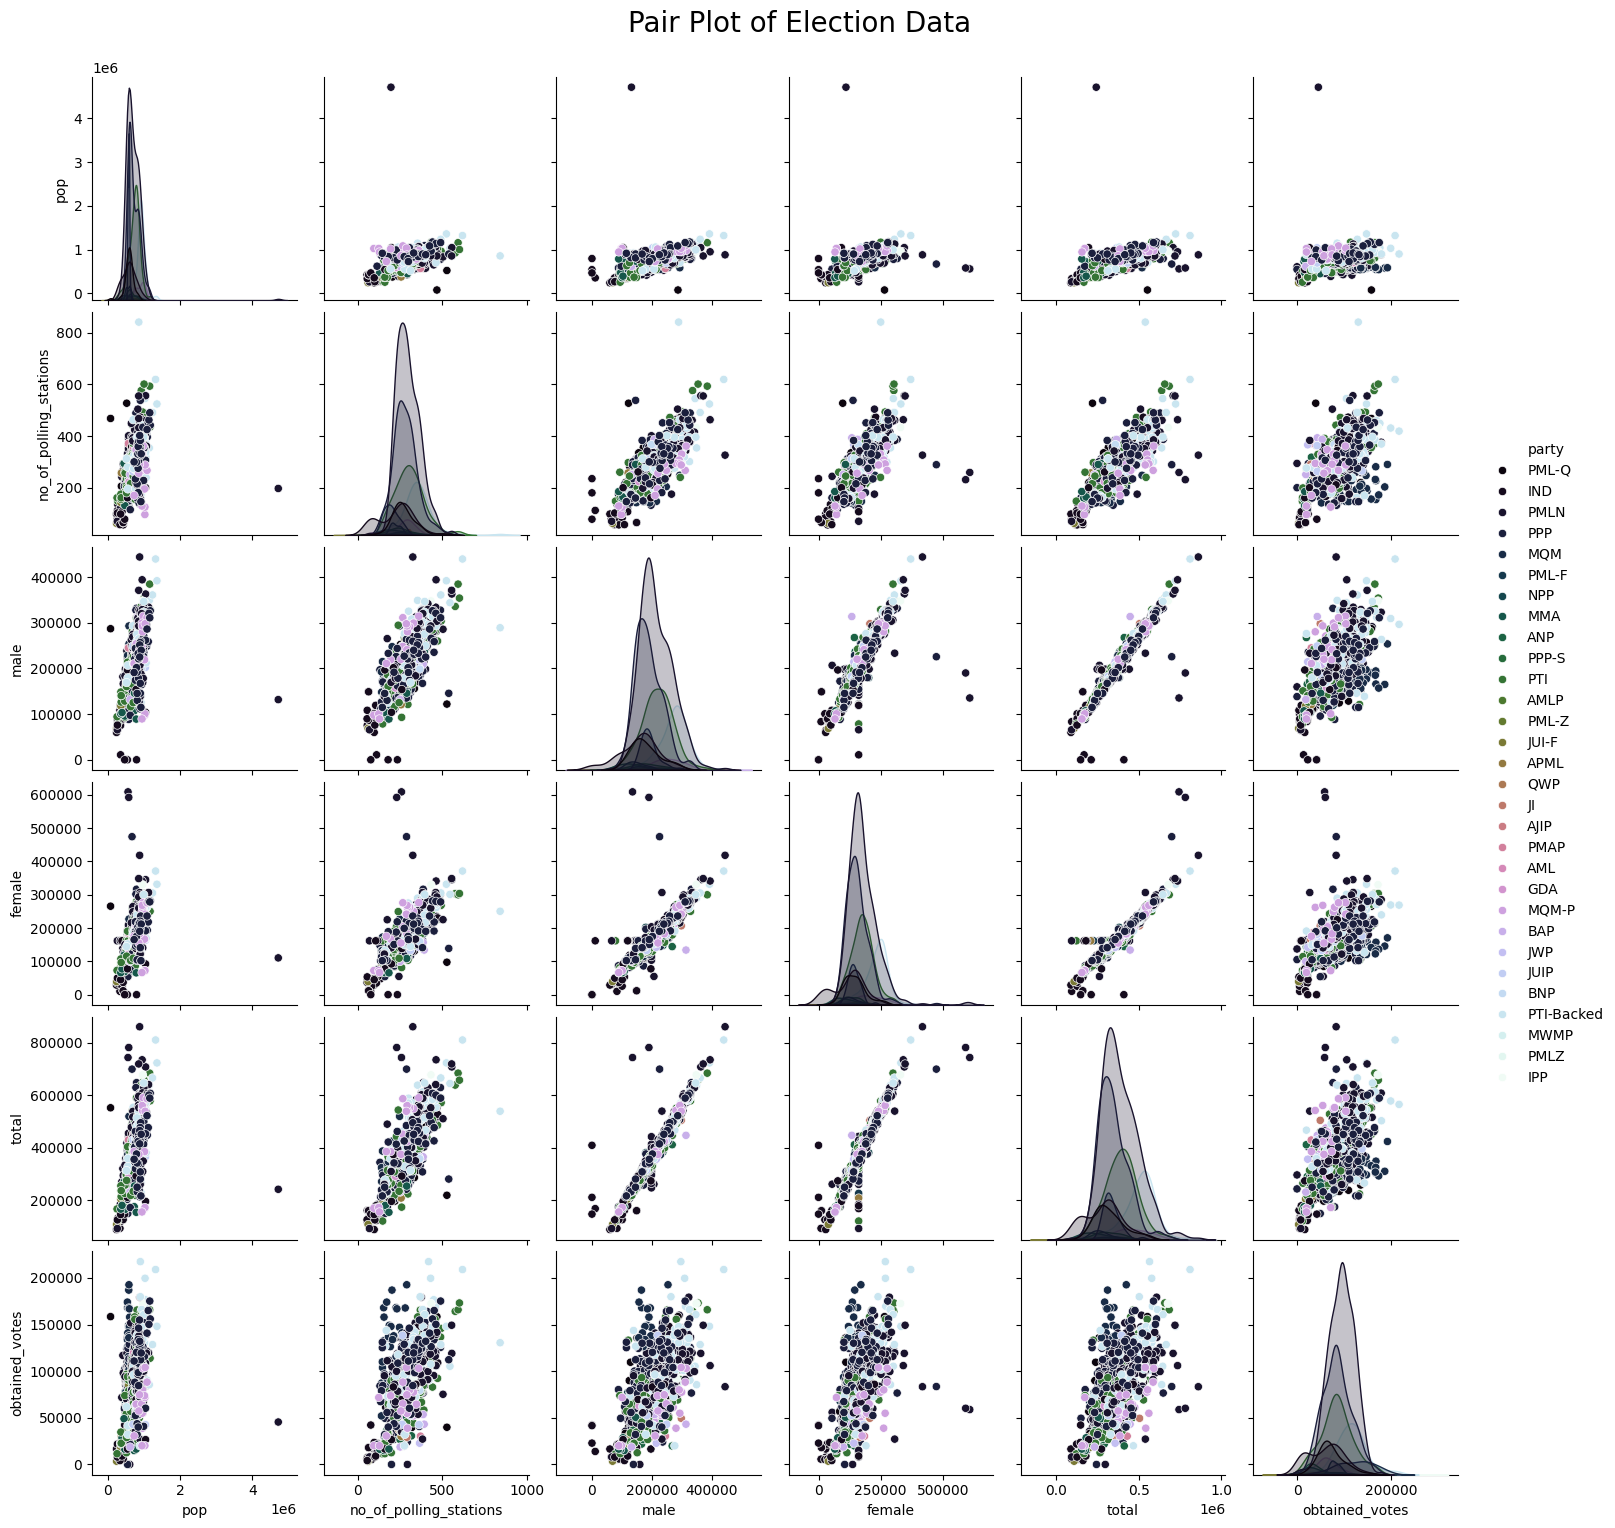

In [60]:
sns.pairplot(df_cleaned[['pop', 'no_of_polling_stations', 'male', 'female', 'total', 'obtained_votes', 'party']], hue='party', palette='cubehelix')

plt.suptitle('Pair Plot of Election Data', y=1.02, fontsize=20)
plt.show()


# Save Cleaned Data

In [61]:
df_cleaned.to_csv('cleaned_election_data.csv', index=False)
print("Cleaned data saved to 'cleaned_election_data.csv'")


Cleaned data saved to 'cleaned_election_data.csv'
